In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [56]:
data=pd.read_csv("train (1).csv")

In [57]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [60]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
data.fillna(data.median())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [62]:
data_pros=data["Embarked"].mode()
data_pros

0    S
dtype: object

In [63]:
data["Embarked"]=data["Embarked"].fillna("S")
data["Embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [64]:
data["Familysize"]=data["SibSp"]+data["Parch"]
data["Familysize"]

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Familysize, Length: 891, dtype: int64

In [65]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
Familysize       9
dtype: int64

In [66]:
data=data.drop(["PassengerId","SibSp","Parch","Ticket","Fare","Name"],axis=1)

In [67]:
data.loc[data['Embarked'] == 'C', 'Embarked'] = 'Cherbourg'

data.loc[data['Embarked'] == 'S', 'Embarked'] = 'Southampton'

data.loc[data['Embarked'] == 'Q', 'Embarked'] = 'Queenstown'
data

,Survived,Pclass,Sex,Age,Cabin,Embarked,Familysize
0,0,3,male,22.0,NaN,Southampton,1
1,1,1,female,38.0,C85,Cherbourg,1
2,1,3,female,26.0,NaN,Southampton,0
3,1,1,female,35.0,C123,Southampton,1
4,0,3,male,35.0,NaN,Southampton,0
...,...,...,...,...,...,...,...
886,0,2,male,27.0,NaN,Southampton,0
887,1,1,female,19.0,B42,Southampton,0
888,0,3,female,NaN,NaN,Southampton,3
889,1,1,male,26.0,C148,Cherbourg,0


In [68]:
bin=[0,13,25,40,65,np.inf]
names=["<13","13-25","25-40","40-65","65+"]
data["Age"]=pd.cut(data["Age"],bin,names,labels=names)

In [69]:
data.head(10)

,Survived,Pclass,Sex,Age,Cabin,Embarked,Familysize
0,0,3,male,13-25,NaN,Southampton,1
1,1,1,female,25-40,C85,Cherbourg,1
2,1,3,female,25-40,NaN,Southampton,0
3,1,1,female,25-40,C123,Southampton,1
4,0,3,male,25-40,NaN,Southampton,0
5,0,3,male,NaN,NaN,Queenstown,0
6,0,1,male,40-65,E46,Southampton,0
7,0,3,male,<13,NaN,Southampton,4
8,1,3,female,25-40,NaN,Southampton,2
9,1,2,female,13-25,NaN,Cherbourg,1


In [70]:
data.Sex=pd.factorize(data.Sex)[0]
data.Embarked=pd.factorize(data.Embarked)[0]  #Infuential Variables
data.Age=pd.factorize(data.Age)[0]
data.head(10)

,Survived,Pclass,Sex,Age,Cabin,Embarked,Familysize
0,0,3,0,0,NaN,0,1
1,1,1,1,1,C85,1,1
2,1,3,1,1,NaN,0,0
3,1,1,1,1,C123,0,1
4,0,3,0,1,NaN,0,0
5,0,3,0,-1,NaN,2,0
6,0,1,0,2,E46,0,0
7,0,3,0,3,NaN,0,4
8,1,3,1,1,NaN,0,2
9,1,2,1,0,NaN,1,1


In [96]:
train=data.sample(frac=0.8,random_state=14)
test=data.drop(train.index)
x_train = train[['Pclass', 'Sex', 'Age', 'Embarked', 'Familysize']]

x_test1= test[['Pclass', 'Sex', 'Age', 'Embarked', 'Familysize']]

y_train = train['Survived']

y_test1 = test['Survived']
np.random.seed(0)


In [97]:
trees=DecisionTreeClassifier(criterion="entropy",max_depth=5)
trees.fit(x_train,y_train)
d_pred=trees.predict(x_test)

In [98]:
from sklearn import tree

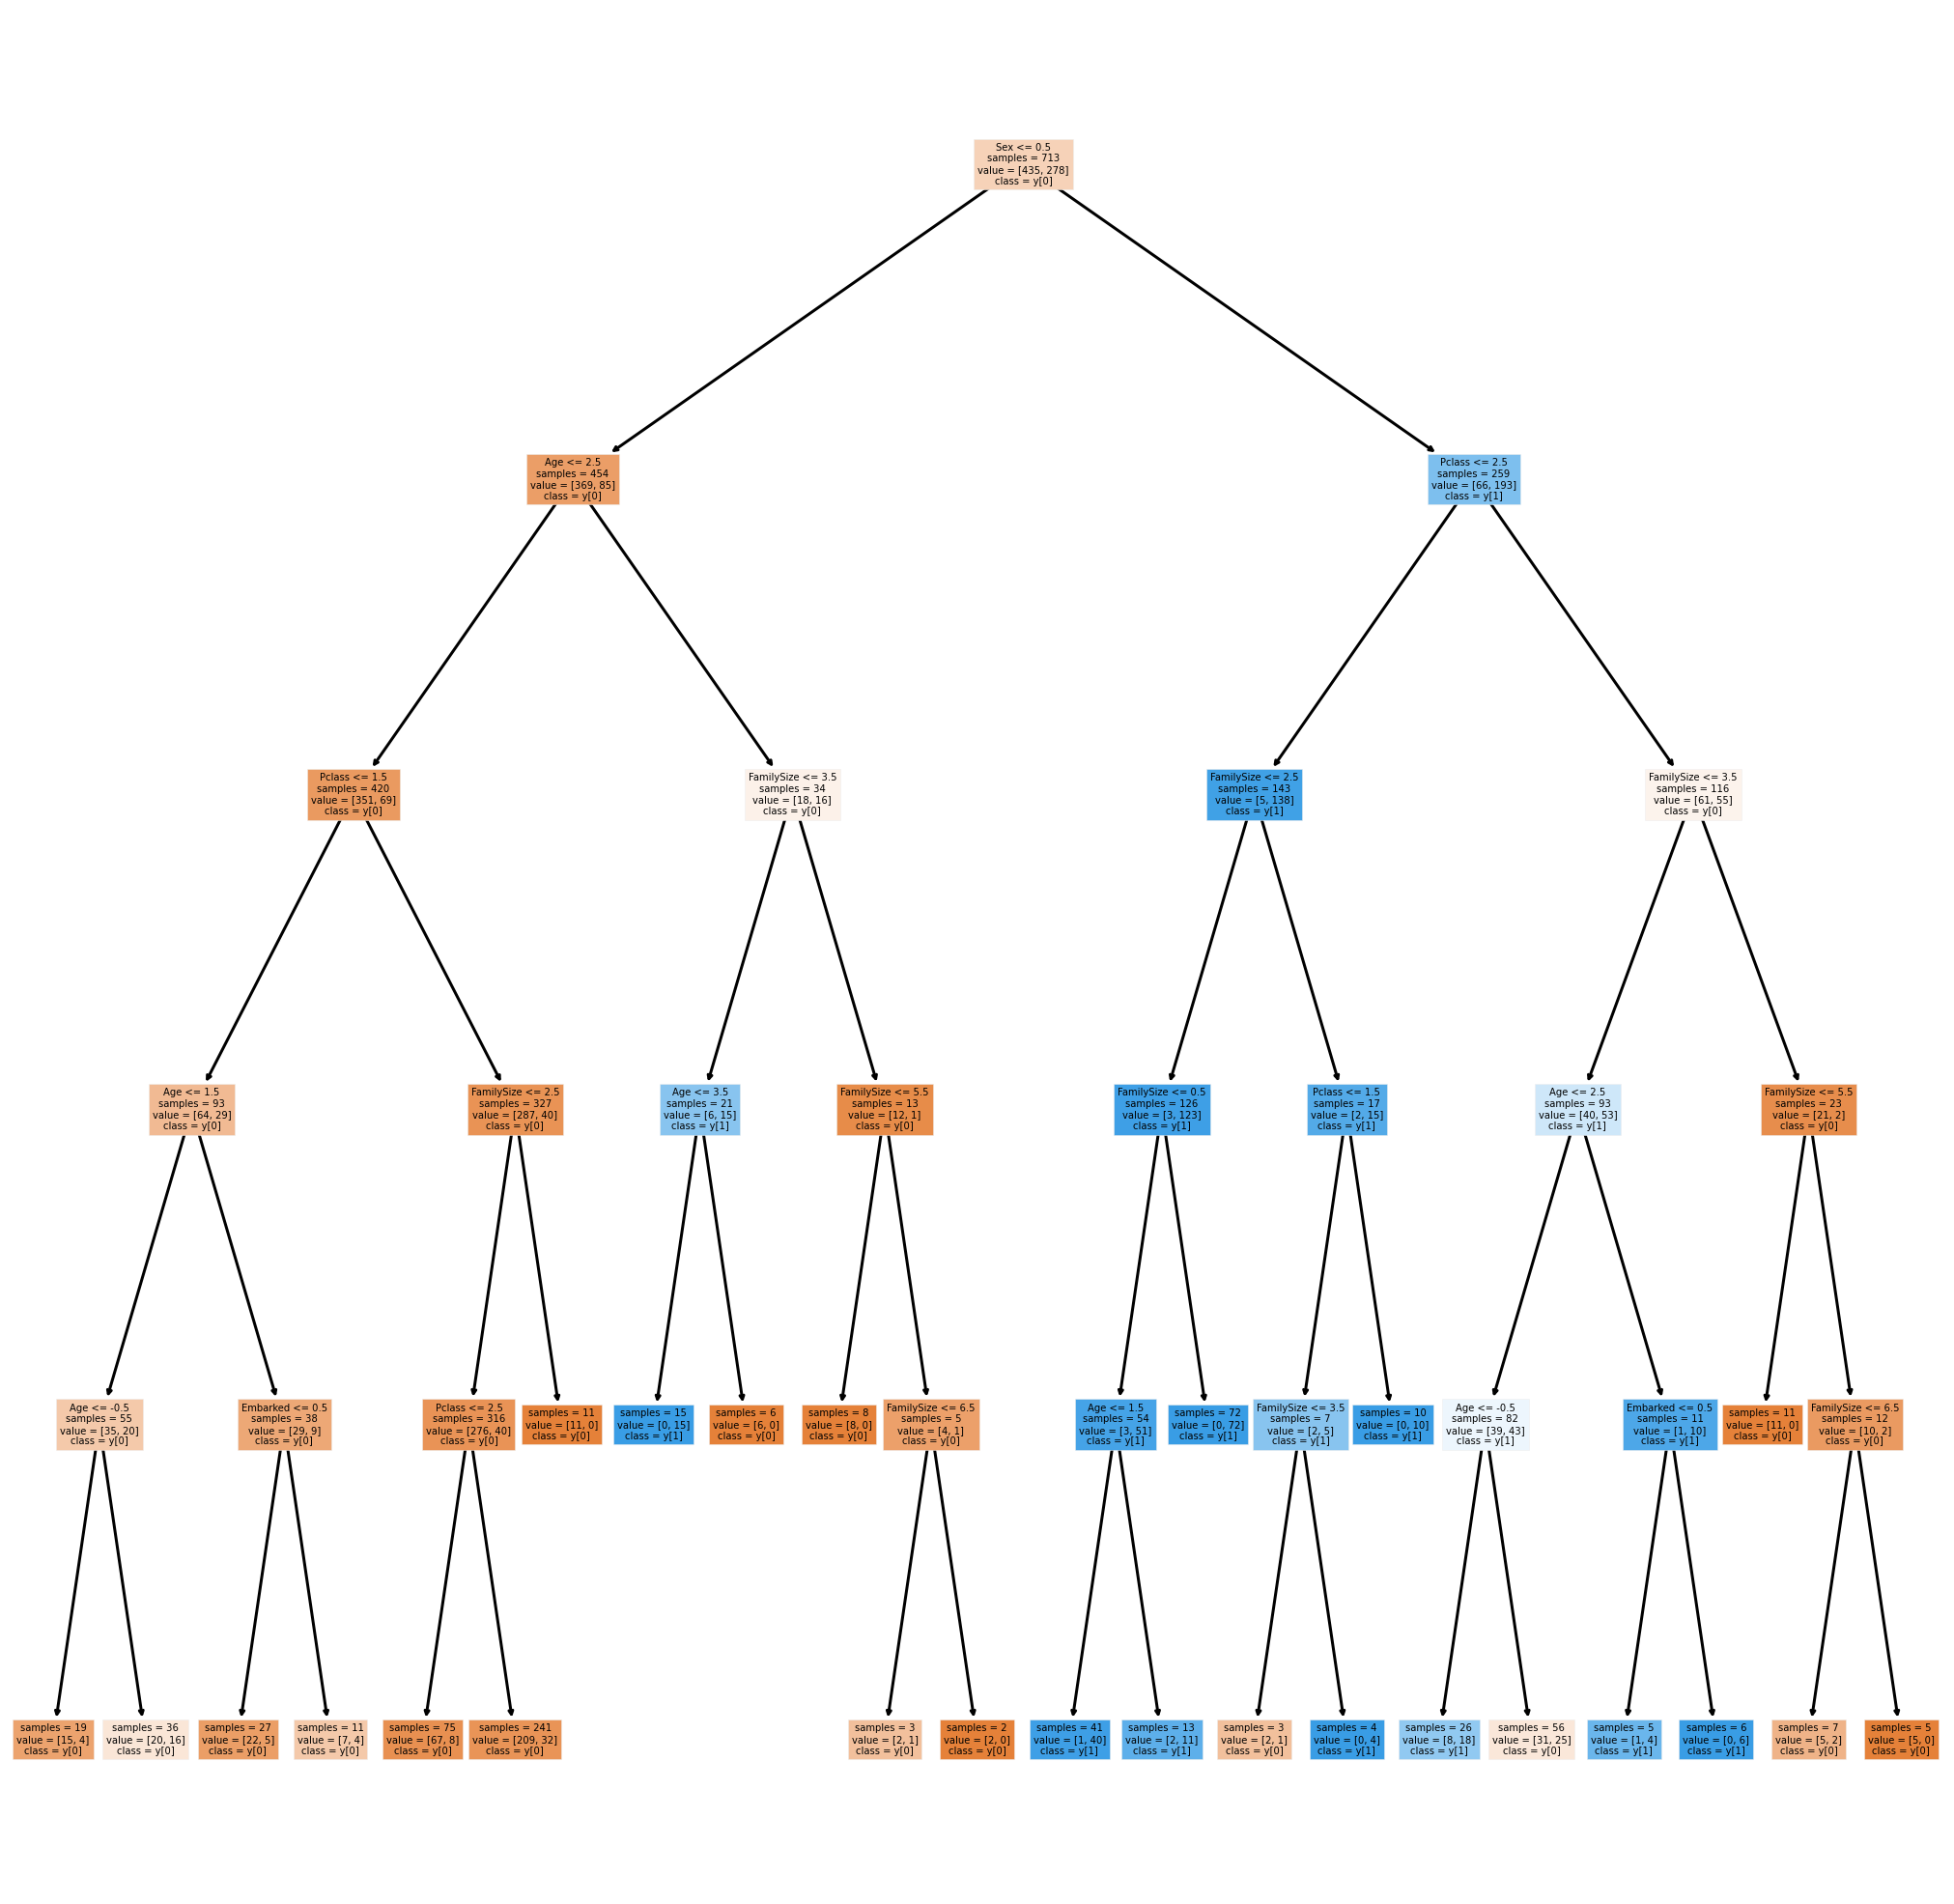

In [99]:
fig,ax=plt.subplots(figsize=(36,36))
out=tree.plot_tree(trees,fontsize=10,max_depth=5,impurity=False,filled=True,feature_names = ['Pclass', 'Sex', 'Age', 'Embarked', 'FamilySize'], class_names = True)
for i in out:
    arrow=i.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(3)
plt.show()        

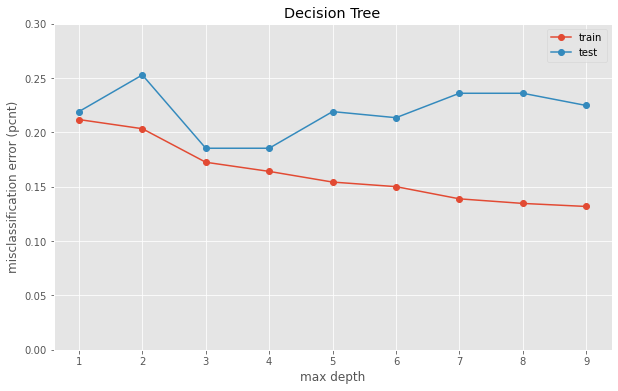

In [100]:
train_score=[]
test_score=[]
for i in range(1,10):
    trees=DecisionTreeClassifier(criterion="entropy",max_depth=i)
    trees.fit(x_train,y_train)
    train_score.append(1-trees.score(x_train,y_train))
    test_score.append(1-trees.score(x_test,y_test))
plt.plot(range(1, 10), train_score, '-o', label = "train")

plt.plot(range(1, 10), test_score, '-o', label = "test")

plt.legend(loc = 'best')

plt.xlabel('max depth')

plt.ylabel('misclassification error (pcnt)')


plt.ylim(0, 0.3)

plt.title(f"Decision Tree")

fig = plt.gcf()

fig.set_size_inches(10, 6)

plt.show() 

In [101]:
trees1=RandomForestClassifier(criterion="entropy",max_depth=5,random_state=0,n_estimators=30)
trees1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=30,
                       random_state=0)

In [102]:
r_pred=trees1.predict(x_test)


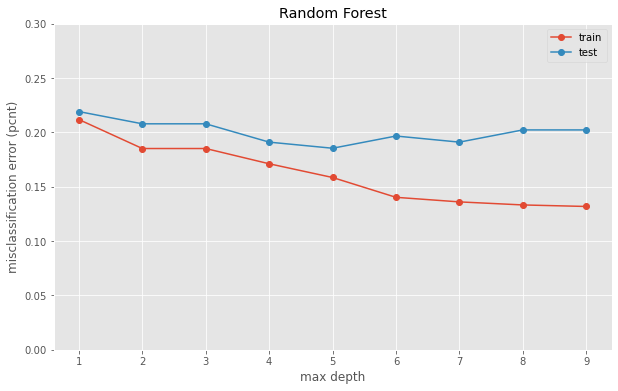

In [103]:
train_score=[]
test_score=[]
for i in range(1,10):
    trees1=RandomForestClassifier(criterion="entropy",max_depth=i,random_state=0,n_estimators=30)
    trees1.fit(x_train,y_train)
    train_score.append(1-trees1.score(x_train,y_train))
    test_score.append(1-trees1.score(x_test,y_test))
plt.plot(range(1, 10), train_score, '-o', label = "train")

plt.plot(range(1, 10), test_score, '-o', label = "test")

plt.legend(loc = 'best')

plt.xlabel('max depth')

plt.ylabel('misclassification error (pcnt)')


plt.ylim(0, 0.3)

plt.title(f"Random Forest")

fig = plt.gcf()

fig.set_size_inches(10, 6)

plt.show()  

In [106]:
from sklearn import metrics
print("Accuracy of random tree:",(metrics.accuracy_score(y_test, r_pred))*100)

Accuracy of random tree: 81.46067415730337


In [107]:
print("Accuracy of Decision Tree:",(metrics.accuracy_score(y_test1,d_pred))*100)

Accuracy of Decision Tree: 78.08988764044943


In [ ]:
#Hence Random forest gives accorate results than Decision Tree 